<a href="https://colab.research.google.com/github/ismailyou/nlp_repo/blob/main/huggingface_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

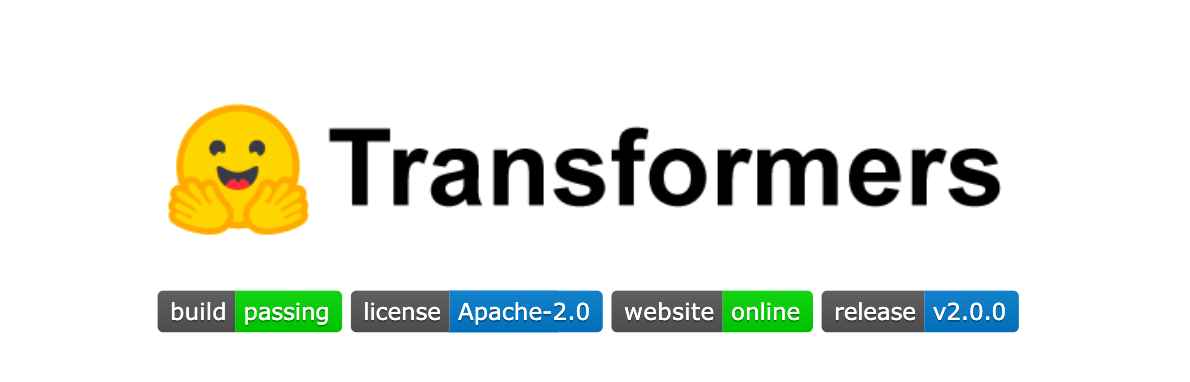

**Hello readers & coders,**

**Here i'm try to implement the most NLP tasks, using HuggingFace transformers, so all the model used in this notebook was reproduced on [HuggingFace](https://huggingface.co/models), with better explanation associated with a github repos for more tricks and tips.**


---



# Transformers installation

In [ ]:
! pip install transformers
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

 The library downloads pretrained models for Natural Language Understanding (NLU) tasks, such as analyzing the sentiment of a text, and Natural Language Generation (NLG), such as completing a prompt with new text or translating in another language.

# Corpus (ENG, AR, FR)

In [ ]:
fr_sentences = ["On est souvent trompé en amour, souvent blessé et souvent malheureux ; mais on aime.", 
                "Le Bonheur c'est du malheur qui se repose , alors il ne faut pas le réveiller",
                "les gens heureux ne perdent pas leur temps en faisant du mal aux autres.",
                "La méchanceté c'est pour les gens malheureux, frustrés, médiocres et envieux."]

In [ ]:
ar_sentences = ["الرجل الغبي يخبر المرأه بأن تسكت, و الرجل الحكيم يخبرها بأن فمها جميل جدا عندما تكون شفتيها مغلقة ",
                "لا يمكنك أن تطير بأجنحة مكسورة، و لا يمكنك أن تحب بقلب مكسور.", 
                "لا يهم كم أنت بطيئ طالما أنك لن تتوقف.", "لا يمكنك أن تحطمني!"]

In [ ]:
en_sentences = ["All I ever wanted was to be your everything.","ismail : Uh... you're sad?"
                "I’ve been waiting more than 30 years to say this: 'Dad, I always told you I’d come back and get my degree.'",
                "Because faith is believing in the unseen. Faith is taking the first step. Faith is jumping in the deep end and KNOWING everything will be OK.",
                "Always bear in mind that your own resolution to succeed is more important than any other."]

# Huggingface pipeline


🤗 Transformers provides the following tasks out of the box:

- Sentiment analysis: is a text positive or negative?
- Text generation (in English): provide a prompt and the model will generate what follows.
- Name entity recognition (NER): in an input sentence, label each word with the entity it represents (person, place,
  etc.)
- Question answering: provide the model with some context and a question, extract the answer from the context.
- Filling masked text: given a text with masked words (e.g., replaced by `[MASK]`), fill the blanks.
- Summarization: generate a summary of a long text.
- Translation: translate a text in another language.
- Feature extraction: return a tensor representation of the text.

Let's see how this work for sentiment analysis

# 1 - Sentiment Analysis
Is a text positive or negative?

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

In [ ]:
classifier('We are very happy to show you the 🤗 Transformers library.')

You can use it on a list of sentences, which will be preprocessed then fed to the model as a batch, returning a list of dictionaries like this one:

### Apply on english text

In [ ]:
en_sentences

In [ ]:
en_results = classifier(en_sentences)

for result in en_results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

### Apply on arabic text

In [ ]:
ar_sentences

In [ ]:
ar_results = classifier(ar_sentences)
for result in ar_results:
    print(f"label : {result['label']}, with : {round(result['score'], 2)}")

### Apply on french text

Let's say we want to use another model; for instance, one that has been trained on French data. We can search through
the [model hub](https://huggingface.co/models) that gathers models pretrained on a lot of data by research labs, but
also community models (usually fine-tuned versions of those big models on a specific dataset). Applying the tags
"French" and "text-classification" gives back a suggestion "nlptown/bert-base-multilingual-uncased-sentiment". Let's
see how we can use it.

In [ ]:
fr_sentences

In [ ]:
fr_results = classifier(fr_sentences)

for result in fr_results:
    print(f"label : {result['label']}, with : {round(result['score'], 2)}")

In [ ]:
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
fr_results = classifier(fr_sentences)

for result in fr_results:
    print(f"label : {result['label']}, with : {round(result['score'], 2)}")

In [ ]:
classifier(["je te deteste", "l'amour", "je t'aime"])

# 2 - Text Generation
provide a prompt and the model will generate what follows.

### Pipeline Model

In [ ]:
text_generator = pipeline("text-generation")

### Apply on english text

In [ ]:
from transformers import set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

In [ ]:
print(generator("As far as I am concerned, I will", max_length=50, do_sample=False))

## Arabic Sentences

for more information please refer to the folowing [Colab nootbok](https://colab.research.google.com/drive/1mRl7c-5v-Klx27EEAEOAbrfkustL4g7a?usp=sharing#scrollTo=6T4xerLOAKMj&uniqifier=4)

In [ ]:
# import and initialize tokenizer and model (text generation)
from transformers import AutoTokenizer, AutoModelWithLMHead
tokenizer = AutoTokenizer.from_pretrained("akhooli/gpt2-small-arabic")
model = AutoModelWithLMHead.from_pretrained("akhooli/gpt2-small-arabic")

In [ ]:
prompt = "القدس مدينة تاريخية تقع في "

In [ ]:
input_ids = tokenizer.encode(prompt, return_tensors='pt').to('cuda') 
model.to('cuda');

In [ ]:
%%time
max_length = 504
#set top_k = 40 and num_return_sequences = 3
sample_outputs = model.generate(input_ids, pad_token_id=50256,
                                   do_sample=True, 
                                   max_length=max_length, 
                                   min_length=max_length,
                                   top_k=40,
                                   num_return_sequences=5)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(sample_output.tolist())))
    print('\n---')

## French Sentence

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pretrained model and tokenizer
model = GPT2LMHeadModel.from_pretrained("antoiloui/belgpt2")
tokenizer = GPT2Tokenizer.from_pretrained("antoiloui/belgpt2")

In [ ]:
import random
# Generate a sample of text
model.eval()
output = model.generate(
            bos_token_id=random.randint(1,50000),
            do_sample=True,   
            top_k=50, 
            max_length=100,
            top_p=0.95, 
            num_return_sequences=1
)

# Decode it
decoded_output = []
for sample in output:
    decoded_output.append(tokenizer.decode(sample, skip_special_tokens=True))
print(decoded_output)

# 3 - Name entity recognition (NER)
label each word with the entity it represents (person, place, etc.)

In [ ]:
ner_pipe = pipeline("ner")

### Apply on english text

In [ ]:
 sequence = """Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO,therefore very close to the Manhattan Bridge which is visible from the window."""

In [ ]:
ner_pipe(sequence)

### For Arabic text [Colab Code](https://colab.research.google.com/drive/1mRl7c-5v-Klx27EEAEOAbrfkustL4g7a?usp=sharing#scrollTo=6T4xerLOAKMj&uniqifier=4)

# 4 - Question answering
provide the model with some context and a question, extract the answer from the context.

In [ ]:
from transformers import pipeline
question_answerer = pipeline("question-answering")

### Apply on english text

In [ ]:
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the examples/pytorch/question-answering/run_squad.py script.
"""

In [ ]:
result = question_answerer(question="What is extractive question answering?", context=context)
result

In [ ]:
result = question_answerer(question="What is a good example of a question answering dataset?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

# 5 - Filling masked text
Given a text with masked words (e.g., replaced by [MASK]), fill the blanks.

In [ ]:
unmasker = pipeline("fill-mask")

### Apply on english text

In [ ]:
unmasker(f"Hello all, all model used in this notebook was {unmasker.tokenizer.mask_token} here.")

In [ ]:
from pprint import pprint
pprint(unmasker(f"HuggingFace is creating a {unmasker.tokenizer.mask_token} that the community uses to solve NLP tasks."))

### Apply on French text

In [ ]:
!pip install SentencePiece

In [ ]:
from transformers import CamembertModel, CamembertTokenizer

# You can replace "camembert-base" with any other model from the table, e.g. "camembert/camembert-large".
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
camembert = CamembertModel.from_pretrained("camembert-base")

In [ ]:
camembert_fill_mask  = pipeline("fill-mask", model="camembert-base", tokenizer="camembert-base")
results = camembert_fill_mask("Le camembert est <mask> :)")

In [ ]:
print(results)

In [ ]:
camembert_fill_mask("Le maroc est <mask> :)")

### Apply on Arabic Text

In [ ]:
from transformers import AutoTokenizer, AutoModel

# Mini:   asafaya/bert-mini-arabic
# Medium: asafaya/bert-medium-arabic
# Base:   asafaya/bert-base-arabic
# Large:  asafaya/bert-large-arabic

tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")
model = AutoModel.from_pretrained("asafaya/bert-base-arabic")

In [ ]:
asafaya_fill_mask  = pipeline("fill-mask", model="asafaya/bert-base-arabic", tokenizer="asafaya/bert-base-arabic")
results = asafaya_fill_mask("باريس [MASK] فرنسا.")

print(results)

In [ ]:
asafaya_fill_mask("لا يمكنك أن [MASK] بأجنحة مكسورة، و لا يمكنك أن تحب بقلب مكسور.")

# 6 - Summarization
Generate a summary of a long text.

### Apply on english text

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
  
tokenizer = AutoTokenizer.from_pretrained("sshleifer/distilbart-cnn-12-6")

model = AutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-cnn-12-6")

In [ ]:
asafaya_summarization  = pipeline("summarization", model=model, tokenizer=tokenizer)
results = asafaya_summarization("The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct.")

print(results)

In [ ]:
results

### Apply on French text

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
tokenizer_fr = T5Tokenizer.from_pretrained("plguillou/t5-base-fr-sum-cnndm")
model_fr = T5ForConditionalGeneration.from_pretrained("plguillou/t5-base-fr-sum-cnndm")

In [ ]:
fr_summarization = pipeline("summarization", model="plguillou/t5-base-fr-sum-cnndm", tokenizer="plguillou/t5-base-fr-sum-cnndm")
results = fr_summarization("La tour fait 324 mètres (1,063 pieds) de haut, environ la même hauteur qu'un immeuble de 81 étages, et est la plus haute structure de Paris. Sa base est carrée, mesurant 125 mètres (410 pieds) sur chaque côté. Durant sa construction, la tour Eiffel surpassa le Washington Monument pour devenir la plus haute structure construite par l'homme dans le monde, un titre qu'elle conserva pendant 41 ans jusqu'à l'achèvement du Chrysler Building à New-York City en 1930. Ce fut la première structure à atteindre une hauteur de 300 mètres. Avec l'ajout d'une antenne de radiodiffusion au sommet de la tour Eiffel en 1957, celle-ci redevint plus haute que le Chrysler Building de 5,2 mètres (17 pieds). En excluant les transmetteurs, elle est la seconde plus haute stucture autoportante de France après le viaduc de Millau.")


In [ ]:
results

# 7 - Translation
Translate a text in another language.

mbart-large-cc25
Pretrained (not finetuned) multilingual mbart model. Original Languages

In [ ]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
article_ar = "الأمين العام للأمم المتحدة يقول إنه لا يوجد حل عسكري في سوريا."

model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

### Arabic to English

In [ ]:
tokenizer.src_lang = "ar_AR"
encoded_ar = tokenizer(article_ar, return_tensors="pt")
generated_tokens = model.generate(**encoded_ar, forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"])
arabic_ti_english = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)


In [ ]:
arabic_ti_english

### Arabic To French

In [ ]:
# translate arabic to French
tokenizer.src_lang = "ar_AR"
encoded_hi = tokenizer(article_ar, return_tensors="pt")
generated_tokens = model.generate(**encoded_hi, forced_bos_token_id=tokenizer.lang_code_to_id["fr_XX"])
arabic_to_fr = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)


In [ ]:
arabic_to_fr

### French To English

In [ ]:
# translate arabic to French
tokenizer.src_lang = "fr_XX"
encoded_hi = tokenizer(arabic_to_fr, return_tensors="pt")
generated_tokens = model.generate(**encoded_hi, forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"])
fr_to_en = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

In [ ]:
fr_to_en

# 8 - Feature extraction
Return a tensor representation of the text

### Apply on English Text

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/LaBSE-en-ru")
model = AutoModel.from_pretrained("cointegrated/LaBSE-en-ru")

In [ ]:
encoded_input = tokenizer(en_sentences, padding=True, truncation=True, max_length=64, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)
embeddings = model_output.pooler_output
embeddings = torch.nn.functional.normalize(embeddings)
print(embeddings)

The current model has only English and Russian tokens left in the vocabulary. Thus, the vocabulary is 10% of the original, and number of parameters in the whole model is 27% of the original, without any loss in the quality of English and Russian embeddings.